# LAB02 Assigment Template




### Exercise 0  Importing the census 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames



# Pretty display for notebooks
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv("census.csv")

data.head()



,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Exercise 1  Exploration 

In [2]:
print(data.dtypes)
data_columns = ['age', 'workclass', 'education_level', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# The total number of records
data.shape[0]

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object


45222

In [3]:
# The number of individuals making more than $50000 annually

data2 = data[data.income == '>50K'].reset_index()

print(data.shape[0], data2.shape[0])


45222 11208


In [4]:
# The number of individuals making at most $50000 annually

print(data[data.income == '<=50K'].reset_index().shape[0])


34014


<=50K    0.752156
>50K     0.247844
Name: income, dtype: float64


<AxesSubplot:title={'center':'Income Ratio'}>

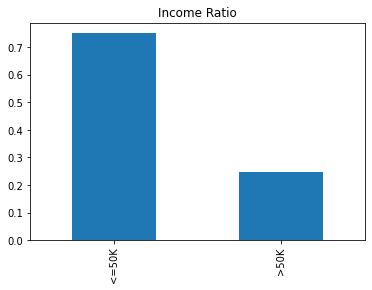

In [5]:
# The percentage of individuals making at more than $50000 annually
Income_Ratio = data['income'].value_counts(normalize=True)
print(Income_Ratio)
Income_Ratio.plot.bar(title='Income Ratio')

### Exercise 2 Preprocessing 

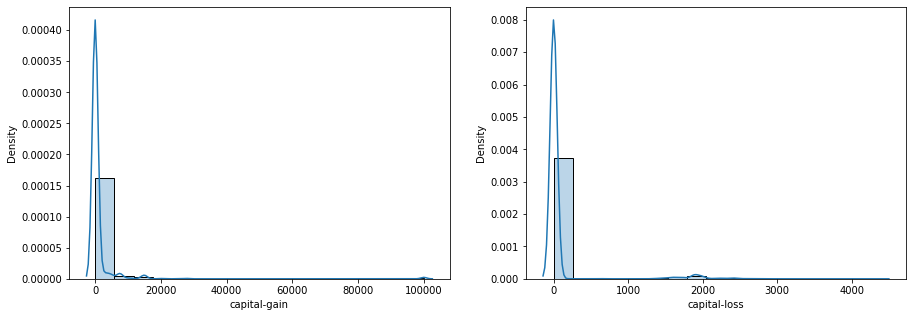

In [6]:
# Visualize skewed continuous features of original data

fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.histplot(data['capital-gain'], ax=axes[0], 
             kde=True, stat='density', 
             kde_kws=dict(cut=3), alpha=.3)
sns.histplot(data['capital-loss'], ax=axes[1], 
             kde=True, stat='density', 
             kde_kws=dict(cut=3), alpha=.3)

plt.show()


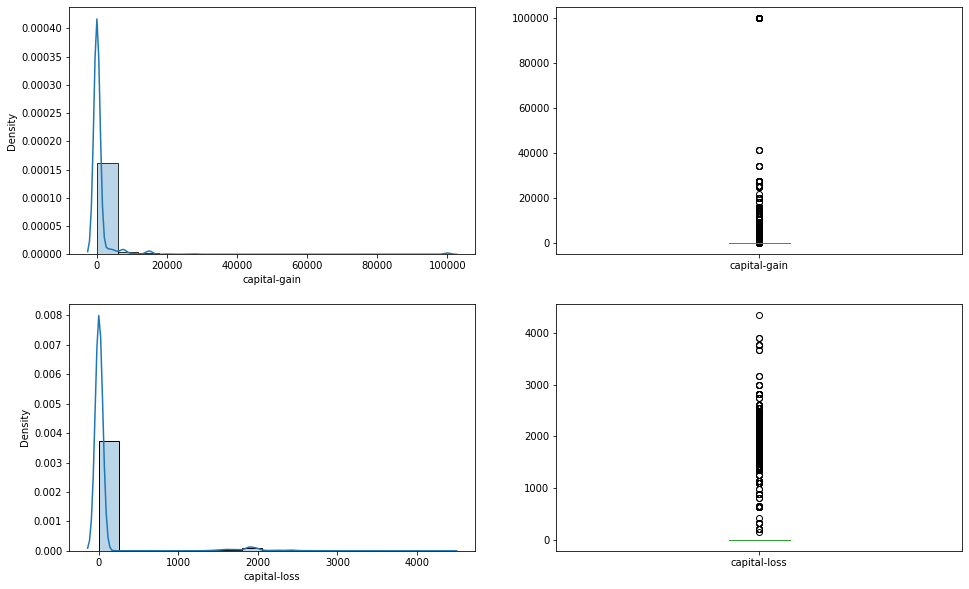

In [7]:
# Outliers Treatment

plt.subplot(221)
sns.histplot(data['capital-gain'], kde=True, stat='density', kde_kws=dict(cut=3), alpha=.3)

plt.subplot(222)
data['capital-gain'].plot.box(figsize=(16, 10))


plt.subplot(223)
sns.histplot(data['capital-loss'], kde=True, stat='density', kde_kws=dict(cut=3), alpha=.3)

plt.subplot(224)
data['capital-loss'].plot.box()

plt.show()


In [8]:
# Utilities
def print_skewness_kurtosis(dataframe, other):
    print("The skewness of the original data is {}".format(dataframe.skew()))
    print('The skewness of the other transformed data is {}'.format(other.skew()))
    print('')
    print("The kurtosis of the original data is {}".format(dataframe.kurt()))
    print("The kurtosis of the other transformed data is {}".format(other.kurt()))

In [9]:
# copy data
df = data.copy()

##### Apply logarithm

check skew & kurt : before & after logarithm

In [10]:
#  Data Transformation
df['Log_capital-gain'] = np.log(df['capital-gain'] + 1e-6)
df['Log_capital-loss'] = np.log(df['capital-loss'] + 1e-6)

print('capital-gain:')

print_skewness_kurtosis(df['capital-gain'], df['Log_capital-gain'])

print('\n---\n')

print('capital-loss:')

print_skewness_kurtosis(df['capital-loss'], df['Log_capital-loss'])

capital-gain:
The skewness of the original data is 11.789002180291192
The skewness of the other transformed data is 3.0158490605521284

The kurtosis of the original data is 150.15129227909196
The kurtosis of the other transformed data is 7.1251957186593575

---

capital-loss:
The skewness of the original data is 4.516304152981587
The skewness of the other transformed data is 4.2650456283706415

The kurtosis of the original data is 19.36396949822179
The kurtosis of the other transformed data is 16.194095826055488


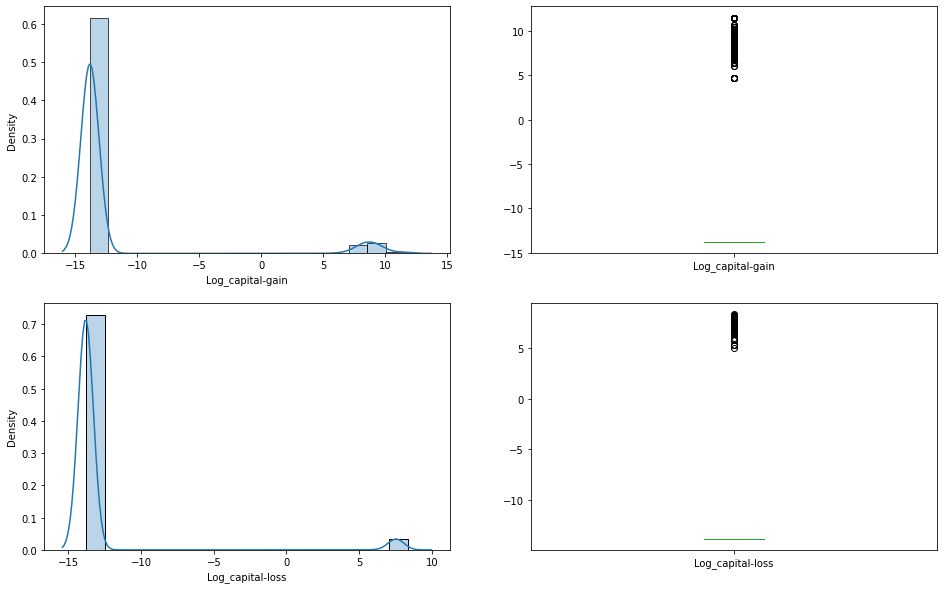

In [11]:
plt.subplot(221)
sns.histplot(df['Log_capital-gain'], kde=True, stat='density', kde_kws=dict(cut=3), alpha=.3)

plt.subplot(222)
df['Log_capital-gain'].plot.box(figsize=(16, 10))


plt.subplot(223)
sns.histplot(df['Log_capital-loss'], kde=True, stat='density', kde_kws=dict(cut=3), alpha=.3)

plt.subplot(224)
df['Log_capital-loss'].plot.box()

plt.show()

In [12]:

print_skewness_kurtosis(df['capital-loss'], df['Log_capital-loss'])

The skewness of the original data is 4.516304152981587
The skewness of the other transformed data is 4.2650456283706415

The kurtosis of the original data is 19.36396949822179
The kurtosis of the other transformed data is 16.194095826055488


##### Normalizing

Data preperation

In [13]:
# Perform simplified one-hot encoding on the data
non_digital_columns = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
df = pd.get_dummies(df, columns=non_digital_columns, drop_first=True)

df = df.drop('capital-gain', axis=1)
df = df.drop('capital-loss', axis=1)

df.head()

,age,education-num,hours-per-week,Log_capital-gain,Log_capital-loss,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_>50K
0,39,13.0,40.0,7.684324,-13.815511,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,50,13.0,13.0,-13.815511,-13.815511,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,38,9.0,40.0,-13.815511,-13.815511,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7.0,40.0,-13.815511,-13.815511,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13.0,40.0,-13.815511,-13.815511,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Noramlize data using StandardScaler

In [14]:
numeral = ['capital-gain', 'capital-loss']
Log_numeral = ['Log_capital-gain', 'Log_capital-loss']
Z_numeral = ['Z_capital-gain', 'Z_capital-loss']

df[Log_numeral].head()

,Log_capital-gain,Log_capital-loss
0,7.684324,-13.815511
1,-13.815511,-13.815511
2,-13.815511,-13.815511
3,-13.815511,-13.815511
4,-13.815511,-13.815511


In [15]:
# Applying a scaling to the data
from sklearn.preprocessing import StandardScaler

# df[Z_numeral] = StandardScaler().fit_transform(df[numeral])

normalize_columns = ['age', 'education-num', 'Log_capital-gain', 'Log_capital-loss', 'hours-per-week']
display(df[normalize_columns].head())

df[normalize_columns] = StandardScaler().fit_transform(df[normalize_columns])

df[normalize_columns].head()


,age,education-num,Log_capital-gain,Log_capital-loss,hours-per-week
0,39,13.0,7.684324,-13.815511,40.0
1,50,13.0,-13.815511,-13.815511,13.0
2,38,9.0,-13.815511,-13.815511,40.0
3,53,7.0,-13.815511,-13.815511,40.0
4,28,13.0,-13.815511,-13.815511,40.0


,age,education-num,Log_capital-gain,Log_capital-loss,hours-per-week
0,0.034201,1.128753,3.119129,-0.222859,-0.078120
1,0.866417,1.128753,-0.302123,-0.222859,-2.326738
2,-0.041455,-0.438122,-0.302123,-0.222859,-0.078120
3,1.093385,-1.221559,-0.302123,-0.222859,-0.078120
4,-0.798015,1.128753,-0.302123,-0.222859,-0.078120


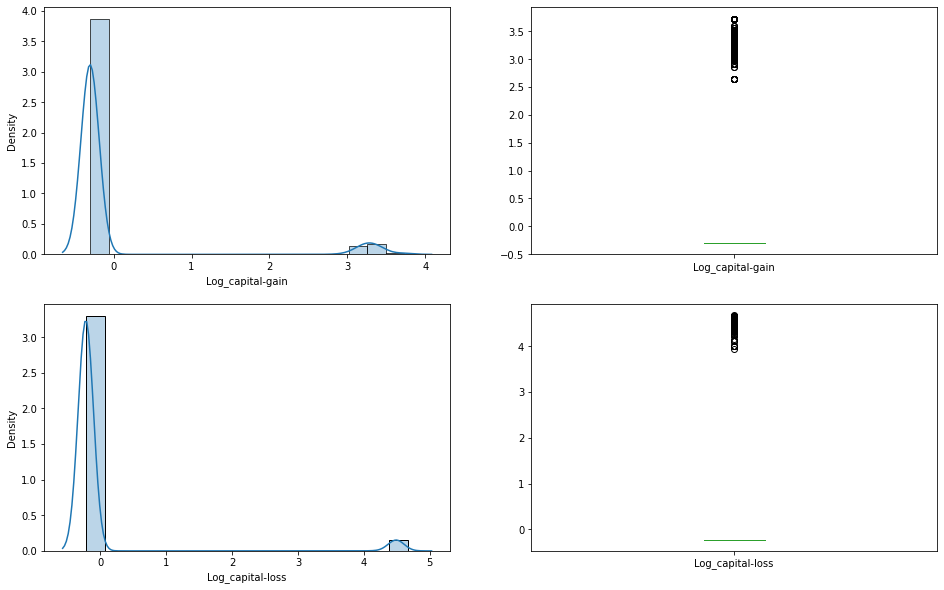

In [16]:
# check the shape
plt.subplot(221)
sns.histplot(df['Log_capital-gain'], kde=True, stat='density', kde_kws=dict(cut=3), alpha=.3)

plt.subplot(222)
df['Log_capital-gain'].plot.box(figsize=(16, 10))


plt.subplot(223)
sns.histplot(df['Log_capital-loss'], kde=True, stat='density', kde_kws=dict(cut=3), alpha=.3)

plt.subplot(224)
df['Log_capital-loss'].plot.box()

plt.show() # The shape doesn't change

### Exercise 3 Shuffle and Split Data

In [17]:
df.head()

,age,education-num,hours-per-week,Log_capital-gain,Log_capital-loss,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_>50K
0,0.034201,1.128753,-0.078120,3.119129,-0.222859,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0.866417,1.128753,-2.326738,-0.302123,-0.222859,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.041455,-0.438122,-0.078120,-0.302123,-0.222859,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.093385,-1.221559,-0.078120,-0.302123,-0.222859,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.798015,1.128753,-0.078120,-0.302123,-0.222859,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Split the 'feature' and 'income' data into training and testing sets
from sklearn.model_selection import train_test_split
print(df.shape[0])
df_train, df_test = train_test_split(df, train_size=0.8, random_state=0)
print(df_train.shape[0], df_test.shape[0])

45222
36177 9045


### Exercise 4 Questions
What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

y_train = df_train['income_>50K']
x_train = df_train.drop('income_>50K', axis=1)

y_test = df_test['income_>50K']
x_test = df_test.drop('income_>50K', axis=1)

model = LogisticRegression()
model.fit(x_train, y_train)

y_prediction = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_prediction)
f_score = metrics.f1_score(y_test, y_prediction)

print('Logistic Regression accuracy =', accuracy, '; F-score =', f_score)

Logistic Regression accuracy = 0.8411276948590382 ; F-score = 0.6463204528673394


### Exercise 5 Evaluating Model 
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression
You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

In [20]:

from sklearn.neighbors import KNeighborsClassifier

# function
def train_draw_model(model, x_train, x_test, y_train, y_test, name=''):
    model.fit(x_train, y_train)

    y_prediction = model.predict(x_test)

    accuracy = metrics.accuracy_score(y_test, y_prediction)
    f_score = metrics.f1_score(y_test, y_prediction)

    print(name, 'accuracy =', accuracy, '; F-score =', f_score)

    y_pred = model.predict_proba(x_test)

    fper, tper, thresholds = metrics.roc_curve(y_test, y_pred[:, 1]) 
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc_score = metrics.roc_auc_score(y_test, y_pred[:, 1])
    print('AUC:', auc_score)

In [21]:
# # Logistic Regression
# train_draw_model(LogisticRegression(), x_train, x_test, y_train, y_test, 'Logistic Regression')

Gaussian Naive Bayes accuracy = 0.5827529021558873 ; F-score = 0.5213089802130898


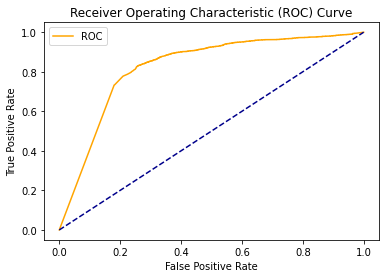

AUC: 0.8247527549031308


In [22]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
train_draw_model(GaussianNB(), x_train, x_test, y_train, y_test, 'Gaussian Naive Bayes')

Decision Tree Classifier accuracy = 0.8163626312880045 ; F-score = 0.6212086659064995


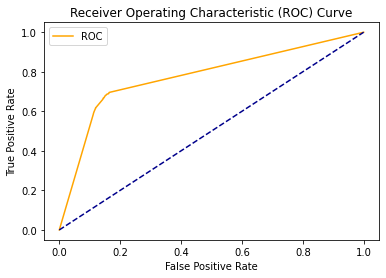

AUC: 0.7754040524591903


In [23]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
train_draw_model(DecisionTreeClassifier(), x_train, x_test, y_train, y_test, 'Decision Tree Classifier')

RandomForestClassifier accuracy = 0.8442233278054173 ; F-score = 0.6623532231008866


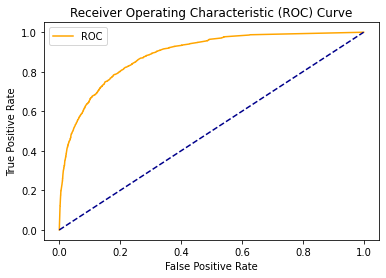

AUC: 0.8879331264669611


In [24]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
train_draw_model(RandomForestClassifier(), x_train, x_test, y_train, y_test, 'RandomForestClassifier')

### Comparison

- `accuracy`: 
    
    `RandomForestClassifier` > `GaussianNB` > `Decision Tree Classifier`

- `F-score`: 
    
    `RandomForestClassifier` > `GaussianNB` > `Decision Tree Classifier`

**ROC curve**:

As mentioned in Lab, ROC shows how good the quality of the evaluation classifier is.

The AUC: `RandomForestClassifier` > `GaussianNB` > `Decision Tree Classifier`

shows that the RandomForestClassifier model performes the best, which accords with accuracy. 

## Question:
### Q1:

#### train & get feature_importance_ attribute

use two models, adaboost and random forests. 

In [25]:
# training
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

rfc = RandomForestClassifier()
abc = AdaBoostClassifier()

rfc.fit(x_train, y_train)
abc.fit(x_train, y_train)

label_list = list(x_train.columns)

<BarContainer object of 95 artists>

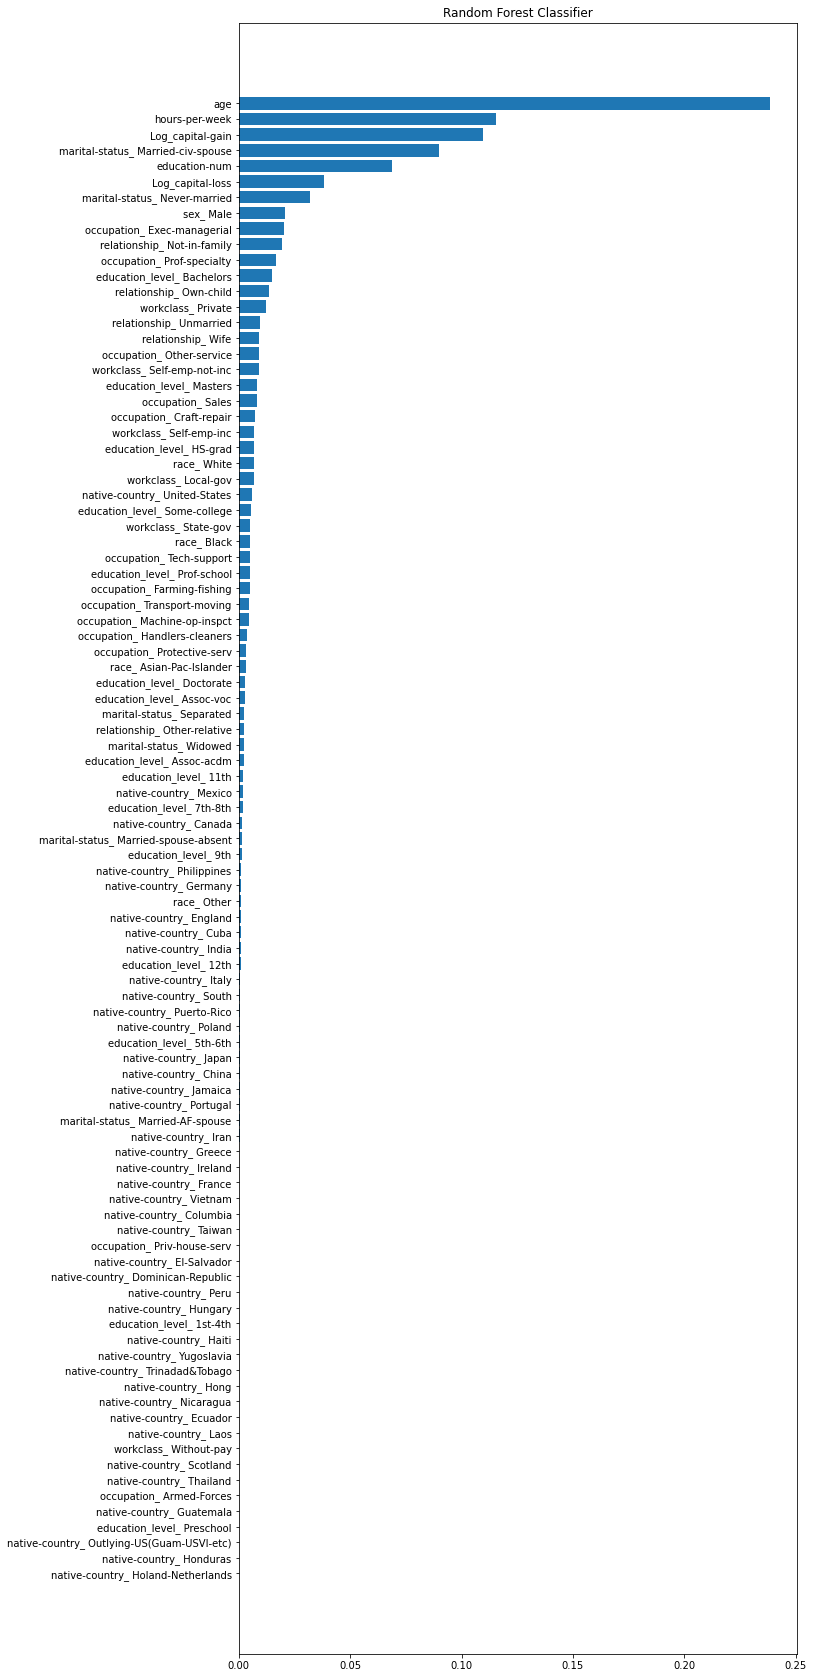

In [26]:
# RandomForestClassifier
feature_importance_sorted, label_list_sorted = list(zip(*sorted(zip(rfc.feature_importances_, label_list))))

plt.figure(figsize=(10, 30))
plt.title('Random Forest Classifier')
plt.barh(label_list_sorted, feature_importance_sorted)

<BarContainer object of 95 artists>

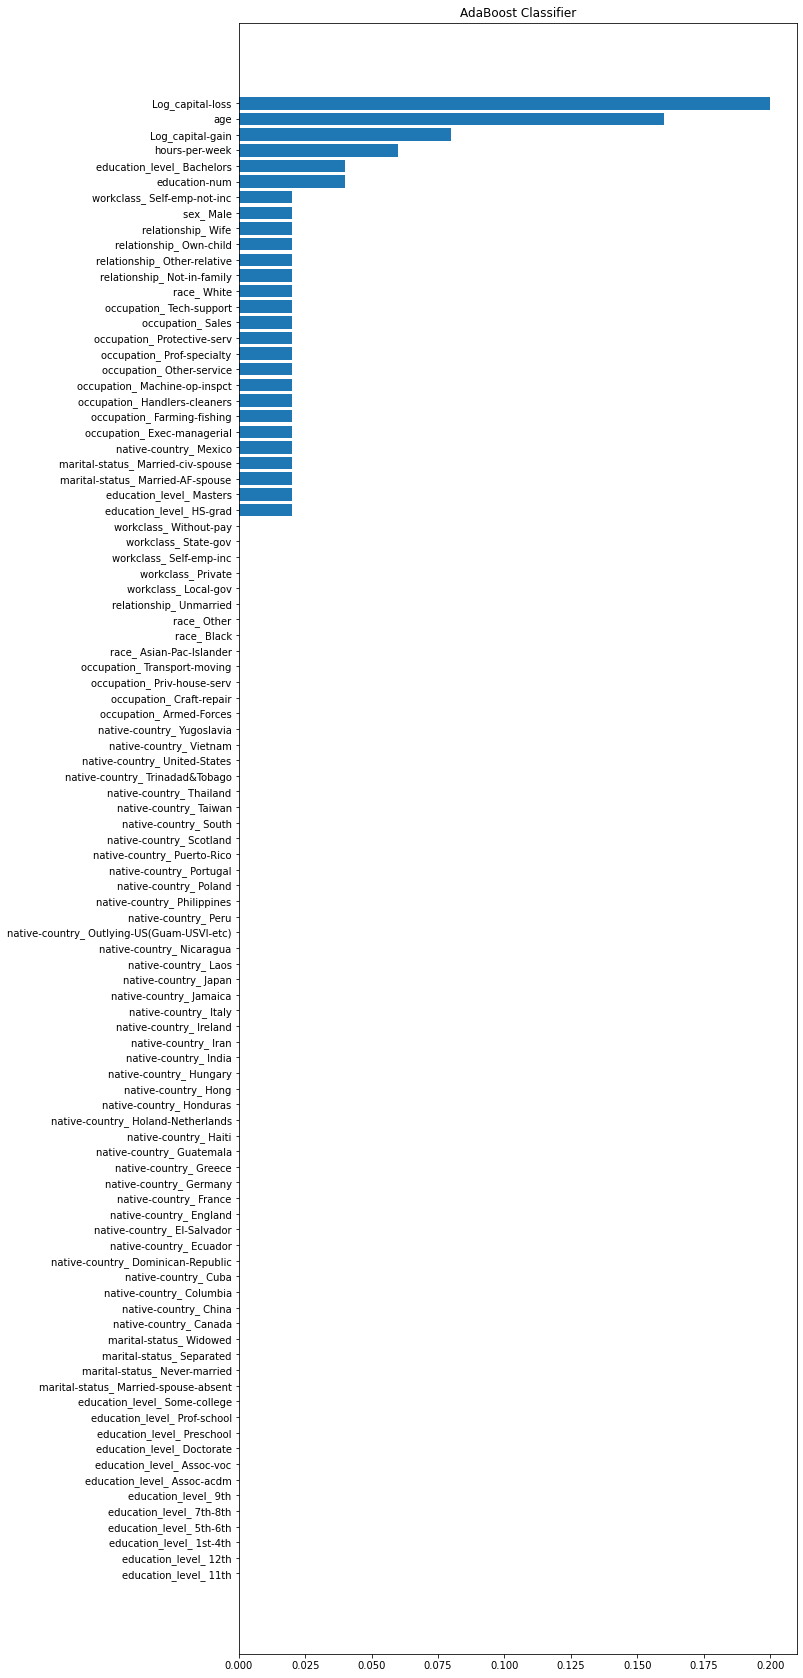

In [27]:
# AdaBoostClassifier
feature_importance_sorted, label_list_sorted = list(zip(*sorted(zip(abc.feature_importances_, label_list))))

plt.figure(figsize=(10, 30))
plt.title('AdaBoost Classifier')
plt.barh(label_list_sorted, feature_importance_sorted)

### Q2

The marketing company can use this model to predict someone's income acoording to his/her basic information, so that they can figure out hwo much they can afford, to sell goods more customized. 

### Q3

